In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

# Load the Excel file
file_path = r"E:\datasets\akansha\inf_ppg.xlsx"
data = pd.read_excel(file_path)

data1= data.iloc[0:7680,4].values
# Display the first few rows of the dataframe
print(data.head())
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
# Perform Empirical Mode Decomposition (EMD)
time = np.linspace(0, len(data1), len(data1))
def emd_decomposition(data, num_imfs=4):
    emd = EMD()
    imfs = emd(data)
    return imfs[:num_imfs]

# Decompose the signal into IMFs
imfs = emd_decomposition(data1)




   Trial 1:0back  Trial 2:2back  Trial 3:3back  Trial 4:2back  Trial 5:3back  \
0         32.862         37.797         35.228         33.780         35.968   
1         32.839         38.170         35.194         33.756         35.932   
2         32.838         38.523         35.158         33.732         35.901   
3         32.861         38.852         35.120         33.710         35.875   
4         32.910         39.155         35.080         33.689         35.853   

   Trial 6:0back  
0         34.755  
1         34.676  
2         34.597  
3         34.517  
4         34.436  


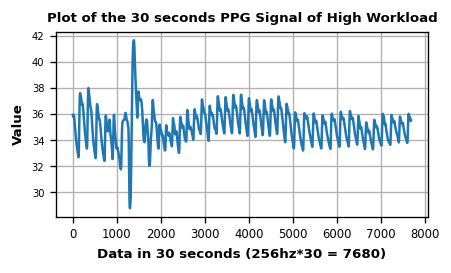

In [10]:
# Plot the data
plt.figure(figsize=(4,2),dpi=120)
plt.plot(data1)
plt.title('Plot of the 30 seconds PPG Signal of High Workload',fontsize=8,fontweight='bold')
plt.xlabel('Data in 30 seconds (256hz*30 = 7680)',fontsize=8,fontweight='bold')
plt.ylabel('Value',fontsize=8,fontweight='bold')
plt.tick_params(axis='x', which='major', labelsize=7)
plt.tick_params(axis='y', which='major', labelsize=6)
plt.grid(True)
plt.show()

In [11]:
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
# Perform Empirical Mode Decomposition (EMD)
time = np.linspace(0, len(data1), len(data1))
def emd_decomposition(data, num_imfs=4):
    emd = EMD()
    imfs = emd(data)
    return imfs[:num_imfs]

# Decompose the signal into IMFs
imfs = emd_decomposition(data1)



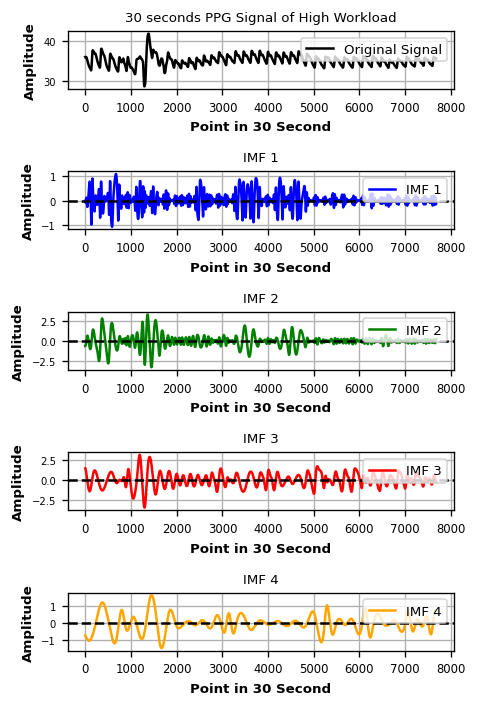

In [12]:
# Plot the original signal and IMFs
plt.figure(figsize=(4,6),dpi=120)

# Plot original signal
plt.subplot(len(imfs)+1, 1, 1)
plt.plot(time, data1, label='Original Signal', color='black')
plt.title('30 seconds PPG Signal of High Workload',fontsize=8)
plt.xlabel('Point in 30 Second',fontsize=8,fontweight='bold')
plt.ylabel('Amplitude',fontsize=8,fontweight='bold')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.tick_params(axis='x', which='major', labelsize=7)
plt.tick_params(axis='y', which='major', labelsize=6)
# Plot IMFs
colors = ['blue', 'green', 'red', 'orange', 'purple']
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs)+1, 1, i+2)
    plt.plot(time, imf, label=f'IMF {i+1}', color=colors[i])
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
    plt.title(f'IMF {i+1}', fontsize=8)
    plt.xlabel('Point in 30 Second', fontsize=8, fontweight='bold')
    plt.ylabel('Amplitude', fontsize=8, fontweight='bold')
    plt.legend(loc='upper right', fontsize=8)
    plt.grid(True)
    plt.tick_params(axis='x', which='major', labelsize=7)
    plt.tick_params(axis='y', which='major', labelsize=6)

plt.tight_layout()
plt.show()

Shape of data1: (7680,)
Type of data1: <class 'numpy.ndarray'>


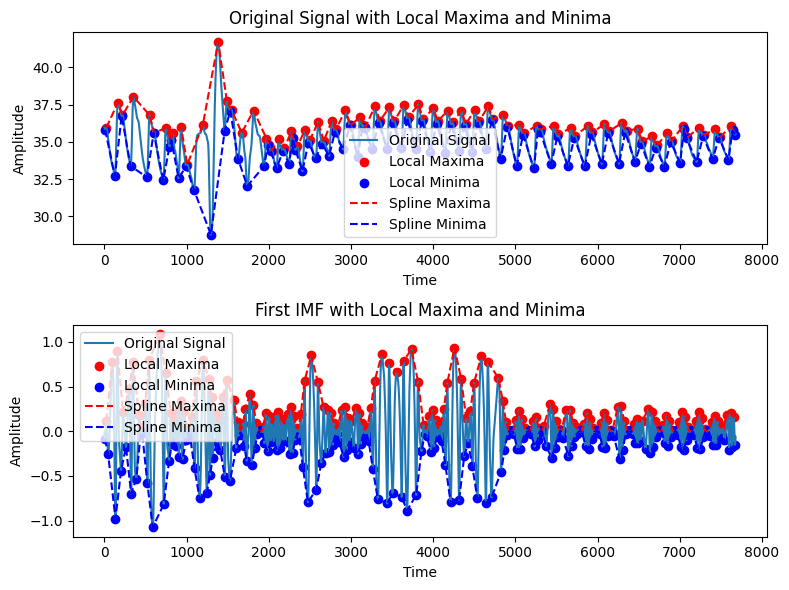

In [16]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

# Load the Excel file
file_path = r"E:\datasets\akansha\inf_ppg.xlsx"
data = pd.read_excel(file_path)

# Extract the desired column and range
data1 = data.iloc[0:7680, 4].values

# Display the shape and type of data1 to verify
print(f"Shape of data1: {data1.shape}")
print(f"Type of data1: {type(data1)}")

# Perform Empirical Mode Decomposition (EMD)
time = np.linspace(0, len(data1), len(data1))

def emd_decomposition(data, num_imfs=4):
    emd = EMD()
    imfs = emd(data)
    # Ensure not to exceed the number of IMFs available
    return imfs[:min(num_imfs, len(imfs))]

# Decompose the signal into IMFs
imfs = emd_decomposition(data1)

# Extract the first IMF
imf1 = imfs[0] if len(imfs) > 0 else None

# Function to find and plot local maxima and minima
def plot_signal_with_extrema(ax, signal, time, title):
    # Find local maxima and minima
    peaks, _ = find_peaks(signal)
    troughs, _ = find_peaks(-signal)
    
    # Spline interpolation
    spline_peaks = UnivariateSpline(time[peaks], signal[peaks], k=3, s=0)
    spline_troughs = UnivariateSpline(time[troughs], signal[troughs], k=3, s=0)
    
    # Plot original signal
    ax.plot(time, signal, label='Original Signal' if len(signal) == len(data1) else 'IMF Signal')
    ax.scatter(time[peaks], signal[peaks], color='r', label='Local Maxima')
    ax.scatter(time[troughs], signal[troughs], color='b', label='Local Minima')
    
    # Plot splines
    ax.plot(time[peaks], spline_peaks(time[peaks]), color='r', linestyle='--', label='Spline Maxima')
    ax.plot(time[troughs], spline_troughs(time[troughs]), color='b', linestyle='--', label='Spline Minima')

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

# Plotting
plt.figure(figsize=(8,6))

# Plot original signal with extrema
plt.subplot(2, 1, 1)
plot_signal_with_extrema(plt.gca(), data1, time, 'Original Signal with Local Maxima and Minima')

# Plot first IMF with extrema
plt.subplot(2, 1, 2)
if imf1 is not None:
    plot_signal_with_extrema(plt.gca(), imf1, time, 'First IMF with Local Maxima and Minima')
else:
    plt.text(0.5, 0.5, 'No IMF available', horizontalalignment='center', verticalalignment='center')
    plt.title('No IMF available')

plt.tight_layout()
plt.show()


Shape of data1: (7680,)
Type of data1: <class 'numpy.ndarray'>


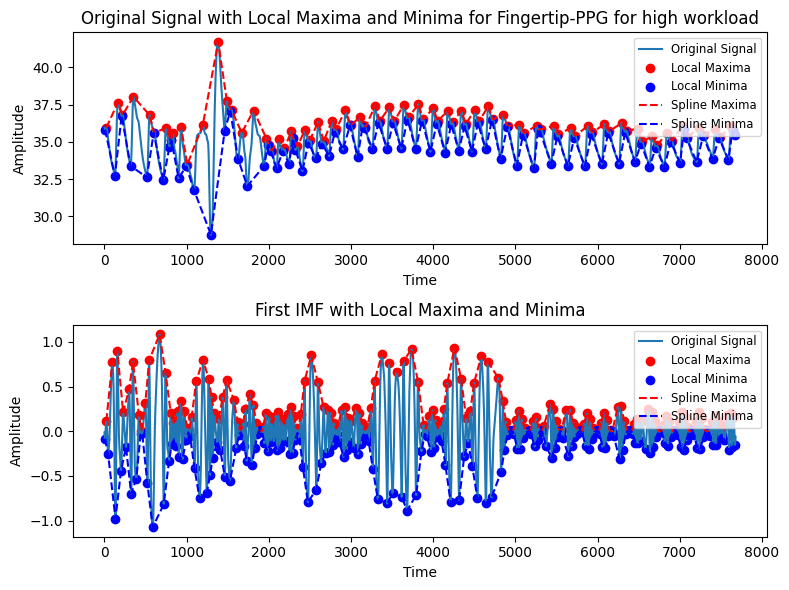

In [18]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

# Load the Excel file
file_path = r"E:\datasets\akansha\inf_ppg.xlsx"
data = pd.read_excel(file_path)

# Extract the desired column and range
data1 = data.iloc[0:7680, 4].values

# Display the shape and type of data1 to verify
print(f"Shape of data1: {data1.shape}")
print(f"Type of data1: {type(data1)}")

# Perform Empirical Mode Decomposition (EMD)
time = np.linspace(0, len(data1), len(data1))

def emd_decomposition(data, num_imfs=4):
    emd = EMD()
    imfs = emd(data)
    # Ensure not to exceed the number of IMFs available
    return imfs[:min(num_imfs, len(imfs))]

# Decompose the signal into IMFs
imfs = emd_decomposition(data1)

# Extract the first IMF
imf1 = imfs[0] if len(imfs) > 0 else None

# Function to find and plot local maxima and minima
def plot_signal_with_extrema(ax, signal, time, title):
    # Find local maxima and minima
    peaks, _ = find_peaks(signal)
    troughs, _ = find_peaks(-signal)
    
    # Spline interpolation
    spline_peaks = UnivariateSpline(time[peaks], signal[peaks], k=3, s=0)
    spline_troughs = UnivariateSpline(time[troughs], signal[troughs], k=3, s=0)
    
    # Plot original signal
    ax.plot(time, signal, label='Original Signal' if len(signal) == len(data1) else 'IMF Signal')
    ax.scatter(time[peaks], signal[peaks], color='r', label='Local Maxima')
    ax.scatter(time[troughs], signal[troughs], color='b', label='Local Minima')
    
    # Plot splines
    ax.plot(time[peaks], spline_peaks(time[peaks]), color='r', linestyle='--', label='Spline Maxima')
    ax.plot(time[troughs], spline_troughs(time[troughs]), color='b', linestyle='--', label='Spline Minima')

    ax.set_title(title)
    ax.legend(loc='upper right', fontsize='small')  # Adjust legend position and font size
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

# Plotting
plt.figure(figsize=(8,6))

# Plot original signal with extrema
plt.subplot(2, 1, 1)
plot_signal_with_extrema(plt.gca(), data1, time, 'Original Signal with Local Maxima and Minima for Fingertip-PPG for high workload')

# Plot first IMF with extrema
plt.subplot(2, 1, 2)
if imf1 is not None:
    plot_signal_with_extrema(plt.gca(), imf1, time, 'First IMF with Local Maxima and Minima')
else:
    plt.text(0.5, 0.5, 'No IMF available', horizontalalignment='center', verticalalignment='center')
    plt.title('No IMF available')

plt.tight_layout()
plt.show()


Shape of data1: (7680,)
Type of data1: <class 'numpy.ndarray'>


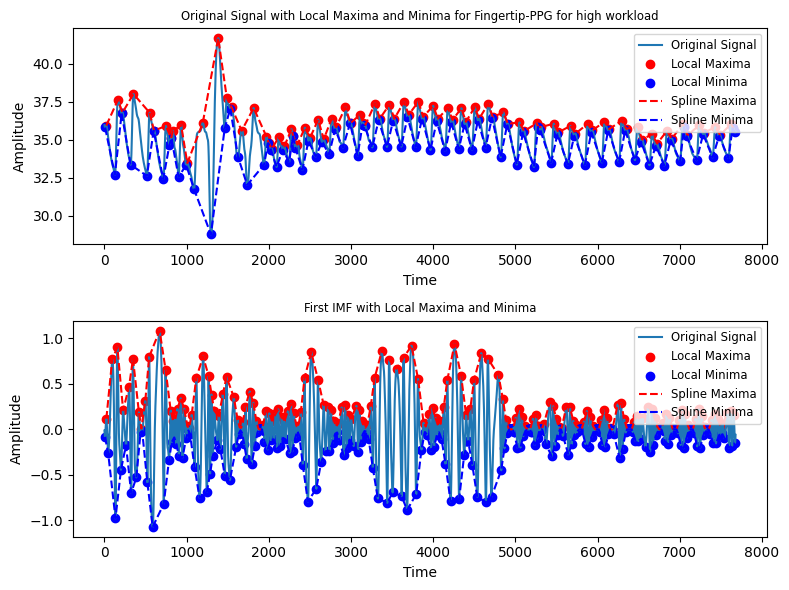

In [19]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

# Load the Excel file
file_path = r"E:\datasets\akansha\inf_ppg.xlsx"
data = pd.read_excel(file_path)

# Extract the desired column and range
data1 = data.iloc[0:7680, 4].values

# Display the shape and type of data1 to verify
print(f"Shape of data1: {data1.shape}")
print(f"Type of data1: {type(data1)}")

# Perform Empirical Mode Decomposition (EMD)
time = np.linspace(0, len(data1), len(data1))

def emd_decomposition(data, num_imfs=4):
    emd = EMD()
    imfs = emd(data)
    # Ensure not to exceed the number of IMFs available
    return imfs[:min(num_imfs, len(imfs))]

# Decompose the signal into IMFs
imfs = emd_decomposition(data1)

# Extract the first IMF
imf1 = imfs[0] if len(imfs) > 0 else None

# Function to find and plot local maxima and minima
def plot_signal_with_extrema(ax, signal, time, title):
    # Find local maxima and minima
    peaks, _ = find_peaks(signal)
    troughs, _ = find_peaks(-signal)
    
    # Spline interpolation
    spline_peaks = UnivariateSpline(time[peaks], signal[peaks], k=3, s=0)
    spline_troughs = UnivariateSpline(time[troughs], signal[troughs], k=3, s=0)
    
    # Plot original signal
    ax.plot(time, signal, label='Original Signal' if len(signal) == len(data1) else 'IMF Signal')
    ax.scatter(time[peaks], signal[peaks], color='r', label='Local Maxima')
    ax.scatter(time[troughs], signal[troughs], color='b', label='Local Minima')
    
    # Plot splines
    ax.plot(time[peaks], spline_peaks(time[peaks]), color='r', linestyle='--', label='Spline Maxima')
    ax.plot(time[troughs], spline_troughs(time[troughs]), color='b', linestyle='--', label='Spline Minima')

    ax.set_title(title, fontsize='small')  # Adjust title size
    ax.legend(loc='upper right', fontsize='small')  # Adjust legend position and font size
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

# Plotting
plt.figure(figsize=(8,6))

# Plot original signal with extrema
plt.subplot(2, 1, 1)
plot_signal_with_extrema(plt.gca(), data1, time, 'Original Signal with Local Maxima and Minima for Fingertip-PPG for high workload')

# Plot first IMF with extrema
plt.subplot(2, 1, 2)
if imf1 is not None:
    plot_signal_with_extrema(plt.gca(), imf1, time, 'First IMF with Local Maxima and Minima')
else:
    plt.text(0.5, 0.5, 'No IMF available', horizontalalignment='center', verticalalignment='center')
    plt.title('No IMF available', fontsize='small')  # Adjust title size

plt.tight_layout()
plt.show()


Shape of data1: (7680,)
Type of data1: <class 'numpy.ndarray'>


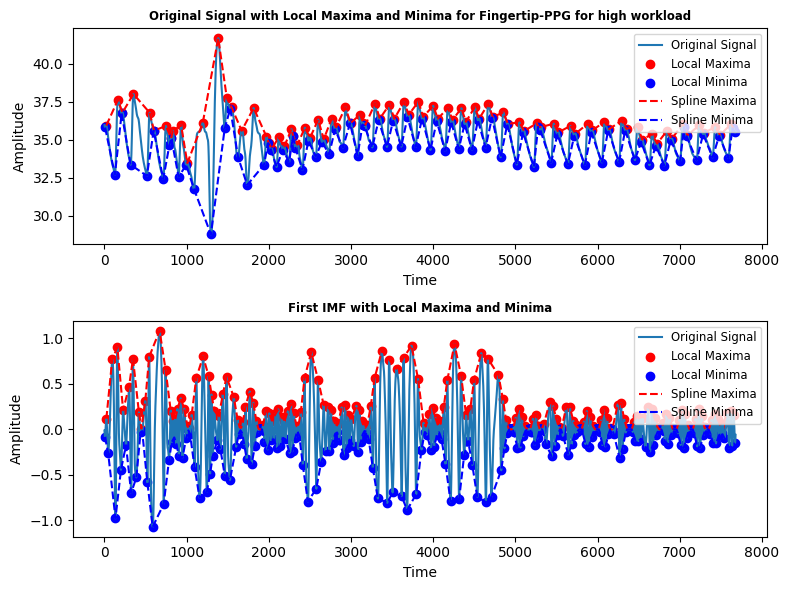

In [20]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

# Load the Excel file
file_path = r"E:\datasets\akansha\inf_ppg.xlsx"
data = pd.read_excel(file_path)

# Extract the desired column and range
data1 = data.iloc[0:7680, 4].values

# Display the shape and type of data1 to verify
print(f"Shape of data1: {data1.shape}")
print(f"Type of data1: {type(data1)}")

# Perform Empirical Mode Decomposition (EMD)
time = np.linspace(0, len(data1), len(data1))

def emd_decomposition(data, num_imfs=4):
    emd = EMD()
    imfs = emd(data)
    # Ensure not to exceed the number of IMFs available
    return imfs[:min(num_imfs, len(imfs))]

# Decompose the signal into IMFs
imfs = emd_decomposition(data1)

# Extract the first IMF
imf1 = imfs[0] if len(imfs) > 0 else None

# Function to find and plot local maxima and minima
def plot_signal_with_extrema(ax, signal, time, title):
    # Find local maxima and minima
    peaks, _ = find_peaks(signal)
    troughs, _ = find_peaks(-signal)
    
    # Spline interpolation
    spline_peaks = UnivariateSpline(time[peaks], signal[peaks], k=3, s=0)
    spline_troughs = UnivariateSpline(time[troughs], signal[troughs], k=3, s=0)
    
    # Plot original signal
    ax.plot(time, signal, label='Original Signal' if len(signal) == len(data1) else 'IMF Signal')
    ax.scatter(time[peaks], signal[peaks], color='r', label='Local Maxima')
    ax.scatter(time[troughs], signal[troughs], color='b', label='Local Minima')
    
    # Plot splines
    ax.plot(time[peaks], spline_peaks(time[peaks]), color='r', linestyle='--', label='Spline Maxima')
    ax.plot(time[troughs], spline_troughs(time[troughs]), color='b', linestyle='--', label='Spline Minima')

    ax.set_title(title, fontsize='small', fontweight='bold')  # Adjust title size and make it bold
    ax.legend(loc='upper right', fontsize='small')  # Adjust legend position and font size
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

# Plotting
plt.figure(figsize=(8,6))

# Plot original signal with extrema
plt.subplot(2, 1, 1)
plot_signal_with_extrema(plt.gca(), data1, time, 'Original Signal with Local Maxima and Minima for Fingertip-PPG for high workload')

# Plot first IMF with extrema
plt.subplot(2, 1, 2)
if imf1 is not None:
    plot_signal_with_extrema(plt.gca(), imf1, time, 'First IMF with Local Maxima and Minima')
else:
    plt.text(0.5, 0.5, 'No IMF available', horizontalalignment='center', verticalalignment='center')
    plt.title('No IMF available', fontsize='small', fontweight='bold')  # Adjust title size and make it bold

plt.tight_layout()
plt.show()


Shape of data1: (7680,)
Type of data1: <class 'numpy.ndarray'>


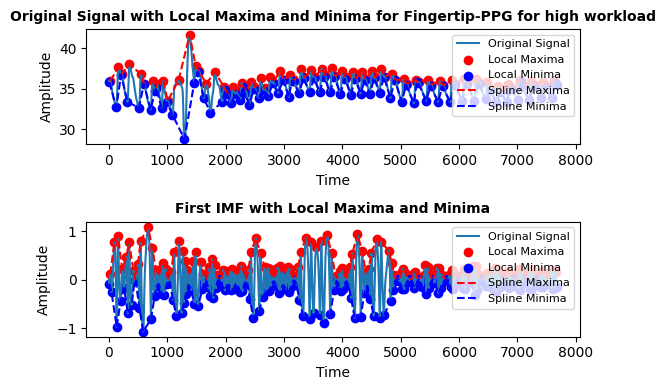

In [21]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

# Load the Excel file
file_path = r"E:\datasets\akansha\inf_ppg.xlsx"
data = pd.read_excel(file_path)

# Extract the desired column and range
data1 = data.iloc[0:7680, 4].values

# Display the shape and type of data1 to verify
print(f"Shape of data1: {data1.shape}")
print(f"Type of data1: {type(data1)}")

# Perform Empirical Mode Decomposition (EMD)
time = np.linspace(0, len(data1), len(data1))

def emd_decomposition(data, num_imfs=4):
    emd = EMD()
    imfs = emd(data)
    # Ensure not to exceed the number of IMFs available
    return imfs[:min(num_imfs, len(imfs))]

# Decompose the signal into IMFs
imfs = emd_decomposition(data1)

# Extract the first IMF
imf1 = imfs[0] if len(imfs) > 0 else None

# Function to find and plot local maxima and minima
def plot_signal_with_extrema(ax, signal, time, title):
    # Find local maxima and minima
    peaks, _ = find_peaks(signal)
    troughs, _ = find_peaks(-signal)
    
    # Spline interpolation
    spline_peaks = UnivariateSpline(time[peaks], signal[peaks], k=3, s=0)
    spline_troughs = UnivariateSpline(time[troughs], signal[troughs], k=3, s=0)
    
    # Plot original signal
    ax.plot(time, signal, label='Original Signal' if len(signal) == len(data1) else 'IMF Signal')
    ax.scatter(time[peaks], signal[peaks], color='r', label='Local Maxima')
    ax.scatter(time[troughs], signal[troughs], color='b', label='Local Minima')
    
    # Plot splines
    ax.plot(time[peaks], spline_peaks(time[peaks]), color='r', linestyle='--', label='Spline Maxima')
    ax.plot(time[troughs], spline_troughs(time[troughs]), color='b', linestyle='--', label='Spline Minima')

    ax.set_title(title, fontsize=10, fontweight='bold')  # Adjust title size and make it bold
    ax.legend(loc='upper right', fontsize=8)  # Adjust legend font size
    ax.set_xlabel('Time', fontsize=10)
    ax.set_ylabel('Amplitude', fontsize=10)

# Plotting
plt.figure(figsize=(6,4))  # Set figure size to 6x4

# Plot original signal with extrema
plt.subplot(2, 1, 1)
plot_signal_with_extrema(plt.gca(), data1, time, 'Original Signal with Local Maxima and Minima for Fingertip-PPG for high workload')

# Plot first IMF with extrema
plt.subplot(2, 1, 2)
if imf1 is not None:
    plot_signal_with_extrema(plt.gca(), imf1, time, 'First IMF with Local Maxima and Minima')
else:
    plt.text(0.5, 0.5, 'No IMF available', horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold')
    plt.title('No IMF available', fontsize=10, fontweight='bold')  # Adjust title size and make it bold

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Shape of data1: (7680,)
Type of data1: <class 'numpy.ndarray'>


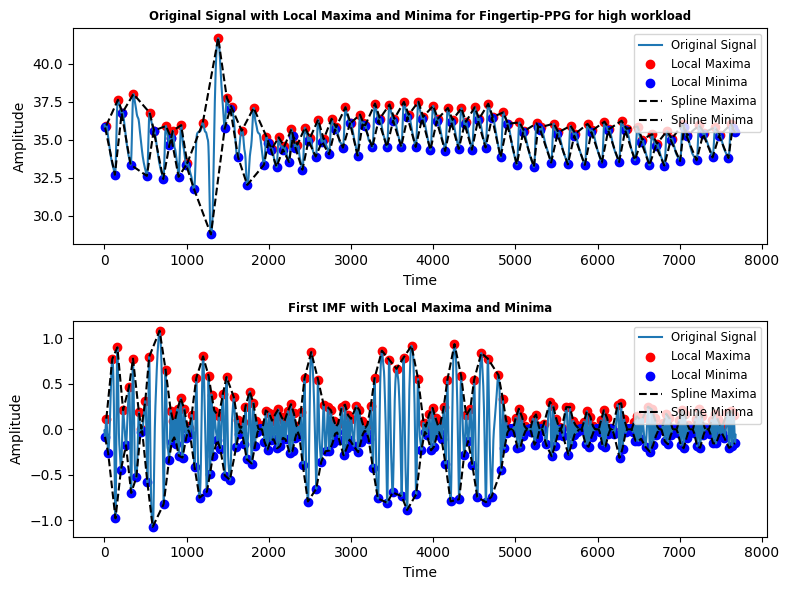

In [22]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

# Load the Excel file
file_path = r"E:\datasets\akansha\inf_ppg.xlsx"
data = pd.read_excel(file_path)

# Extract the desired column and range
data1 = data.iloc[0:7680, 4].values

# Display the shape and type of data1 to verify
print(f"Shape of data1: {data1.shape}")
print(f"Type of data1: {type(data1)}")

# Perform Empirical Mode Decomposition (EMD)
time = np.linspace(0, len(data1), len(data1))

def emd_decomposition(data, num_imfs=4):
    emd = EMD()
    imfs = emd(data)
    # Ensure not to exceed the number of IMFs available
    return imfs[:min(num_imfs, len(imfs))]

# Decompose the signal into IMFs
imfs = emd_decomposition(data1)

# Extract the first IMF
imf1 = imfs[0] if len(imfs) > 0 else None

# Function to find and plot local maxima and minima
def plot_signal_with_extrema(ax, signal, time, title):
    # Find local maxima and minima
    peaks, _ = find_peaks(signal)
    troughs, _ = find_peaks(-signal)
    
    # Spline interpolation
    spline_peaks = UnivariateSpline(time[peaks], signal[peaks], k=3, s=0)
    spline_troughs = UnivariateSpline(time[troughs], signal[troughs], k=3, s=0)
    
    # Plot original signal
    ax.plot(time, signal, label='Original Signal' if len(signal) == len(data1) else 'IMF Signal')
    ax.scatter(time[peaks], signal[peaks], color='r', label='Local Maxima')
    ax.scatter(time[troughs], signal[troughs], color='b', label='Local Minima')
    
    # Plot splines
    ax.plot(time[peaks], spline_peaks(time[peaks]), color='k', linestyle='--', label='Spline Maxima')
    ax.plot(time[troughs], spline_troughs(time[troughs]), color='k', linestyle='--', label='Spline Minima')

    ax.set_title(title, fontsize='small', fontweight='bold')  # Adjust title size and make it bold
    ax.legend(loc='upper right', fontsize='small')  # Adjust legend position and font size
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

# Plotting
plt.figure(figsize=(8,6))

# Plot original signal with extrema
plt.subplot(2, 1, 1)
plot_signal_with_extrema(plt.gca(), data1, time, 'Original Signal with Local Maxima and Minima for Fingertip-PPG for high workload')

# Plot first IMF with extrema
plt.subplot(2, 1, 2)
if imf1 is not None:
    plot_signal_with_extrema(plt.gca(), imf1, time, 'First IMF with Local Maxima and Minima')
else:
    plt.text(0.5, 0.5, 'No IMF available', horizontalalignment='center', verticalalignment='center')
    plt.title('No IMF available', fontsize='small', fontweight='bold')  # Adjust title size and make it bold

plt.tight_layout()
plt.show()


Shape of data1: (7680,)
Type of data1: <class 'numpy.ndarray'>


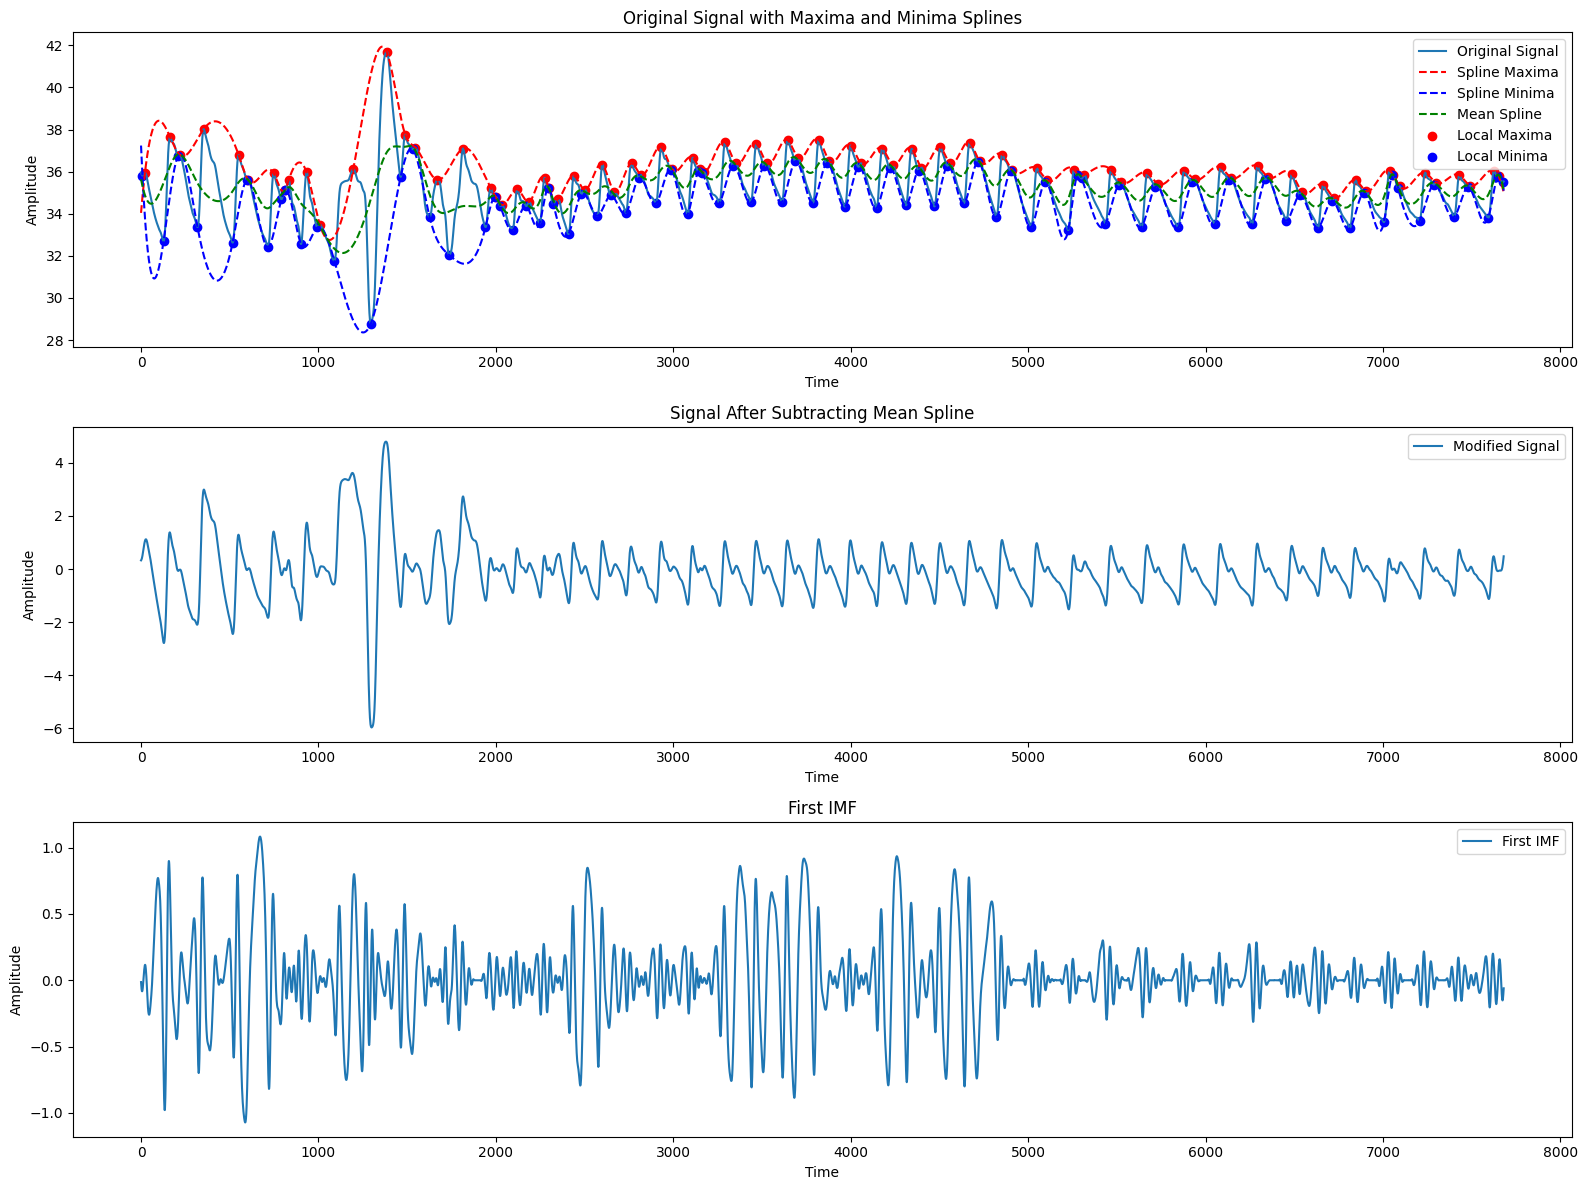

In [15]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

# Load the Excel file
file_path = r"E:\datasets\akansha\inf_ppg.xlsx"
data = pd.read_excel(file_path)

# Extract the desired column and range
data1 = data.iloc[0:7680, 4].values

# Display the shape and type of data1 to verify
print(f"Shape of data1: {data1.shape}")
print(f"Type of data1: {type(data1)}")

# Perform Empirical Mode Decomposition (EMD)
time = np.linspace(0, len(data1), len(data1))

def emd_decomposition(data, num_imfs=4):
    emd = EMD()
    imfs = emd(data)
    return imfs[:min(num_imfs, len(imfs))]

# Decompose the signal into IMFs
imfs = emd_decomposition(data1)

# Extract the first IMF
imf1 = imfs[0] if len(imfs) > 0 else None

# Find local maxima and minima
peaks, _ = find_peaks(data1)
troughs, _ = find_peaks(-data1)

# Spline interpolation
spline_peaks = UnivariateSpline(time[peaks], data1[peaks], k=3, s=0)
spline_troughs = UnivariateSpline(time[troughs], data1[troughs], k=3, s=0)

# Generate spline curves
spline_max = spline_peaks(time)
spline_min = spline_troughs(time)

# Calculate the mean of the splines
mean_spline = (spline_max + spline_min) / 2

# Subtract the mean spline from the original signal
modified_signal = data1 - mean_spline

# Plotting
plt.figure(figsize=(16, 12))

# Plot original signal with splines
plt.subplot(3, 1, 1)
plt.plot(time, data1, label='Original Signal')
plt.plot(time, spline_max, 'r--', label='Spline Maxima')
plt.plot(time, spline_min, 'b--', label='Spline Minima')
plt.plot(time, mean_spline, 'g--', label='Mean Spline')
plt.scatter(time[peaks], data1[peaks], color='r', label='Local Maxima')
plt.scatter(time[troughs], data1[troughs], color='b', label='Local Minima')
plt.title('Original Signal with Maxima and Minima Splines')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot modified signal
plt.subplot(3, 1, 2)
plt.plot(time, modified_signal, label='Modified Signal')
plt.title('Signal After Subtracting Mean Spline')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot first IMF with local maxima and minima
plt.subplot(3, 1, 3)
if imf1 is not None:
    plt.plot(time, imf1, label='First IMF')
    plt.title('First IMF')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
else:
    plt.text(0.5, 0.5, 'No IMF available', horizontalalignment='center', verticalalignment='center')
    plt.title('No IMF available')

plt.tight_layout()
plt.show()
